In [1]:
%matplotlib inline

In [2]:
weather = pd.read_csv("./data/weather.csv")

In [3]:
# date : datetime으로 형변환
weather['date'] = pd.to_datetime(weather['date'])

In [4]:
# codesum의 " " 은 moderate이므로 'MD'를 넣어준다
weather['codesum'].replace(" ",'MD',inplace=True)

In [6]:
# imputation
for i in weather.columns:
    weather[i] = weather[i].replace('-', np.nan)
    weather[i] = weather[i].replace(' ', np.nan)
    weather[i] = weather[i].replace('M', np.nan)

In [7]:
weather['snowfall'] = weather['snowfall'].replace('T', 0.05)
weather['snowfall'] = weather['snowfall'].replace('  T', 0.05)
weather['preciptotal'] = weather['preciptotal'].replace('  T', 0.005)

In [8]:
# column 전체 형변환
weather["tmax"] = weather["tmax"].astype("float")
weather["tmin"] = weather["tmin"].astype("float")
weather["tavg"] = weather["tavg"].astype("float")
weather["depart"] = weather["depart"].astype("float")
weather["dewpoint"] = weather["dewpoint"].astype("float")
weather["wetbulb"] = weather["wetbulb"].astype("float")
weather["heat"] = weather["heat"].astype("float")
weather["cool"] = weather["cool"].astype("float")
weather["stnpressure"] = weather["stnpressure"].astype("float")
weather["sealevel"] = weather["sealevel"].astype("float")
weather["resultspeed"] = weather["resultspeed"].astype("float")
weather["resultdir"] = weather["resultdir"].astype("float")
weather["avgspeed"] = weather["avgspeed"].astype("float")

In [32]:
weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35.0,41.0,21.0,0.0,NaN,NaN,MD,NaN,0.00,29.90,29.99,4.5,3.0,5.3
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32.0,41.0,18.0,0.0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,1.0,9.3
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0644,1738,MD,0.0,0.00,29.78,30.28,10.6,36.0,11.2
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34.0,20.9
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,NaN,NaN,MD,0.0,0.00,29.57,30.27,10.5,36.0,11.2


In [33]:
weather.describe()

,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,20517.000000,19611.000000,19609.000000,19048.000000,9006.000000,19851.000000,19265.000000,19048.000000,19048.000000,19588.000000,18793.000000,19928.000000,19928.000000,19642.000000
mean,10.549057,71.621131,50.654546,61.240130,1.363091,47.270918,53.888243,9.704536,5.944666,29.162770,30.009160,6.468326,18.729928,7.914077
std,5.768533,19.847451,19.139055,19.194357,7.646759,19.400495,17.017772,13.843873,7.834796,1.245414,0.191134,4.192577,9.675662,3.933458
min,1.000000,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,6.000000,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,11.000000,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,29.410000,30.000000,5.700000,18.000000,7.300000
75%,16.000000,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,29.780000,30.130000,8.900000,26.000000,10.100000
max,20.000000,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,30.610000,30.800000,28.400000,36.000000,28.700000


In [34]:
wth = weather
weather.snowfall.unique()

array([nan, '0.0', '0.5', 0.05, '0.2', '3.6', '3.7', '6.1', '0.6', '0.3',
       '2.0', '1.2', '1.4', '2.3', '1.3', '1.0', '4.3', '0.1', '1.7',
       '0.7', '1.9', '0.9', '0.4', '1.6', '4.7', '4.0', '2.1', '7.1',
       '4.2', '1.8', '5.2', '0.8', '1.5', '2.8', '3.0', '5.0', '9.3',
       '2.6', '3.1', '4.4', '3.4', '1.1', '5.5', '15.2', '7.8', '13.5',
       '16.2', '3.5', '2.2', '3.2', '13.1', '4.6', '2.4', '5.4', '7.2',
       '14.9', '7.7', '11.0', '2.9', '5.1', '3.3', '3.9', '7.0', '6.6',
       '8.0', '4.9', '6.2', '6.4', '4.1', '5.8', '2.7', '12.2', '10.5',
       '6.7', '3.8', '5.7', '2.5'], dtype=object)

In [175]:
key = pd.read_csv("key.csv")

In [176]:
# weather와 key merge : station별 store별 날씨
df = key.merge(wth)

In [9]:
year = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').year for i in range(len(weather))]
weather['year'] = year

In [10]:
month = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').month for i in range(len(weather))]
weather['month'] = month

In [11]:
day = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').day for i in range(len(weather))]
weather['day'] = day

In [12]:
weather.to_csv("weather_imputation.csv", index=False)

In [180]:
df.to_csv("KeyWeather_datesliced.csv",index=False)

In [181]:
df[df['station_nbr'] == 5][df['year'] == 2013][df['month'] == 5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,store_nbr,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
43804,35,5,2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,1
43805,35,5,2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,2
43806,35,5,2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,3
43807,35,5,2013-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,4
43808,35,5,2013-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,5
43809,35,5,2013-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,6
43810,35,5,2013-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,7
43811,35,5,2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,8
43812,35,5,2013-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,9
43813,35,5,2013-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,5,10


In [303]:
wth2 = weather.dropna(how='any')
len(weather) , len(wth2), len(weather) - len(wth2)

(20517, 8763, 11754)

In [ ]:
# column별 NaN갯수 파악

In [ ]:
# 연도별 월별 각 column 특징값 파악

In [134]:
station5 = df.loc[df['station_nbr']==5,:]

In [159]:
np.nan in station5.tmax.values 

False

In [194]:
station5_1309 = station5[station5['tmax'].notna()]

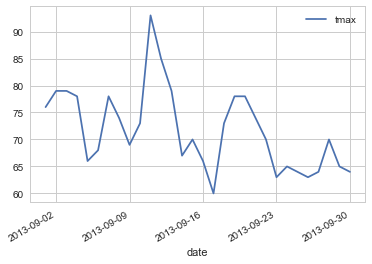

In [196]:
station5.plot(x='date', y='tmax')
plt.show()

In [198]:
station1 = df.loc[df['station_nbr']==1,:] # depart가 모두 na
station2 = df.loc[df['station_nbr']==2,:]
station3 = df.loc[df['station_nbr']==3,:]
station4 = df.loc[df['station_nbr']==4,:]
station5 = df.loc[df['station_nbr']==5,:]
station6 = df.loc[df['station_nbr']==6,:]
station7 = df.loc[df['station_nbr']==7,:]
station8 = df.loc[df['station_nbr']==8,:]
station9 = df.loc[df['station_nbr']==9,:]
station10 = df.loc[df['station_nbr']==10,:]
station11 = df.loc[df['station_nbr']==11,:]
station12 = df.loc[df['station_nbr']==12,:]
station13 = df.loc[df['station_nbr']==13,:]
station14 = df.loc[df['station_nbr']==14,:]
station15 = df.loc[df['station_nbr']==15,:]
station16 = df.loc[df['station_nbr']==16,:]
station17 = df.loc[df['station_nbr']==17,:]
station18 = df.loc[df['station_nbr']==18,:]
station19 = df.loc[df['station_nbr']==19,:]
station20 = df.loc[df['station_nbr']==20,:]

In [222]:
station1.depart.dtype

dtype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


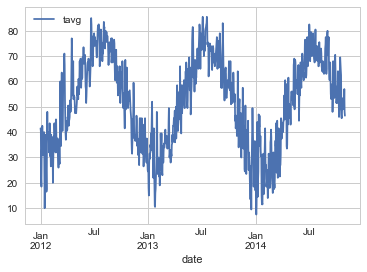

In [214]:
station1.plot(x='date', y=['tavg'])
plt.show()

In [243]:
station1[station1.tavg.isnull()]

,store_nbr,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
302,1,1,2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,29
798,1,1,2014-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,29.75,NaN,6.0,30.0,7.3,2014,3,9


In [251]:
station1[station1.dewpoint.isna()]

,store_nbr,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
302,1,1,2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,29
303,1,1,2012-10-30,61.0,52.0,56.5,NaN,NaN,NaN,8.0,...,NaN,0.40,29.45,NaN,NaN,NaN,14.5,2012,10,30
798,1,1,2014-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,29.75,NaN,6.0,30.0,7.3,2014,3,9
911,1,1,2014-06-30,90.0,63.0,76.5,NaN,NaN,NaN,0.0,...,NaN,0.00,29.85,29.99,8.7,23.0,9.1,2014,6,30
912,1,1,2014-07-01,90.0,68.0,79.0,NaN,NaN,NaN,0.0,...,NaN,0.00,29.70,29.85,10.2,21.0,10.6,2014,7,1
936,1,1,2014-07-25,81.0,56.0,68.5,NaN,NaN,NaN,0.0,...,NaN,0.00,29.79,29.96,4.0,28.0,5.3,2014,7,25


In [256]:
len(station1[station1.dewpoint.isnull()])

6

In [258]:
station1.dewpoint.isnull().sum()

6

20517
entire null count by columns
station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 906 ( 4.42 % )
tmin : 908 ( 4.43 % )
tavg : 912 ( 4.45 % )
depart : 11511 ( 56.1 % )
dewpoint : 666 ( 3.25 % )
wetbulb : 1252 ( 6.1 % )
heat : 1469 ( 7.16 % )
cool : 1469 ( 7.16 % )
sunrise : 9656 ( 47.06 % )
sunset : 9656 ( 47.06 % )
codesum : 0 ( 0.0 % )
snowfall : 7224 ( 35.21 % )
preciptotal : 860 ( 4.19 % )
stnpressure : 929 ( 4.53 % )
sealevel : 1724 ( 8.4 % )
resultspeed : 589 ( 2.87 % )
resultdir : 589 ( 2.87 % )
avgspeed : 875 ( 4.26 % )


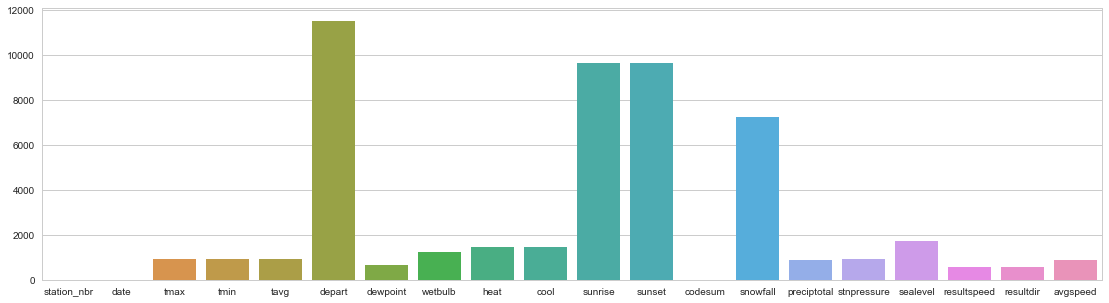

In [289]:
print(len(weather))
print("entire null count by columns")
dic = {}
for i in weather.columns:
    count_null = weather[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / 20517 * 100),2),"%",")")
    
    dic[i] = count_null

plt.figure(figsize=(19,5))    
sns.barplot(x=list(dic.keys()), y=list(dic.values()))
plt.show()

In [272]:
list(dic.keys())

['station_nbr',
 'date',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed']

In [281]:
weather['codesum'].isna().sum()

0

ValueError: max must be larger than min in range parameter.

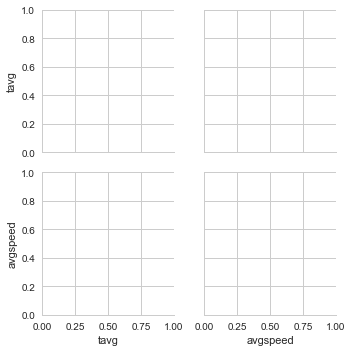

In [286]:
sns.pairplot(station1[["tavg","avgspeed"]])
plt.show()